In [18]:
from os.path import join
import numpy as np
import pandas as pd

In [19]:
PROJ_DIR = "./"
DATA_DIR = join(PROJ_DIR, "dset")

In [5]:
participant_df = pd.read_csv(join(DATA_DIR, "participants.tsv"), sep="\t")
preprocessed_df = pd.read_csv(join(DATA_DIR, "sub-group_task-rest_desc-1S2StTesthabenula_table.txt"), sep="\t")


/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_51053/3534621847.py:1: DtypeWarning: Columns (4,9,41,42,43,93,94,95,96,97,98,99,100,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  participant_df = pd.read_csv(join(DATA_DIR, "participants.tsv"), sep="\t")


In [253]:
participant_df

,participant_id,SUB_ID,ABIDE,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,sub-0050002,50002,1,PITT,no_filename,1,1.0,16.7700,1,Ambi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-0050003,50003,1,PITT,Pitt_0050003,1,1.0,24.4500,1,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-0050004,50004,1,PITT,Pitt_0050004,1,1.0,19.0900,1,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-0050005,50005,1,PITT,Pitt_0050005,1,1.0,13.7300,2,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-0050006,50006,1,PITT,Pitt_0050006,1,1.0,13.3700,1,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,sub-29523,29523,2,USM_1,NaN,2,NaN,36.1451,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2152,sub-29524,29524,2,USM_1,NaN,2,NaN,11.7892,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2153,sub-29525,29525,2,USM_1,NaN,2,NaN,23.2909,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2154,sub-29526,29526,2,USM_1,NaN,2,NaN,32.6242,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
# Get the list of subject IDs from the preprocessed DataFrame
valid_subjects = preprocessed_df["Subj"].unique()

# Filter participant_df to only include matching participant_id entries
preproc_participant_df = participant_df[participant_df["participant_id"].isin(valid_subjects)]


In [255]:
# List of desired columns to keep
measures = [
    "participant_id", "DX_GROUP",
    "VINELAND_DAILYLVNG_STANDARD", "VINELAND_DAILYLIVING_STANDARD",
    "SRS_COMMUNICATION", "SRS_COMMUNICATION_RAW", "SRS_MOTIVATION", "SRS_MOTIVATION_RAW",
    "BRIEF_GEC_T", "ADI_R_RRB_TOTAL_C", "ADOS_2_TOTAL", 
    "ADOS_GOTHAM_TOTAL", "CBCL_6-18_TOTAL_PROBLEM_T", "MASC_TOTAL_T", "RBSR_6SUBSCALE_TOTAL",
    "MASC_TOTAL_T"
]

# Keep only the desired columns
measure_df = preproc_participant_df[measures]

# Replace all -9999 values with np.nan
measure_df = measure_df.replace(-9999, np.nan)



In [256]:
measure_df

,participant_id,DX_GROUP,VINELAND_DAILYLVNG_STANDARD,VINELAND_DAILYLIVING_STANDARD,SRS_COMMUNICATION,SRS_COMMUNICATION_RAW,SRS_MOTIVATION,SRS_MOTIVATION_RAW,BRIEF_GEC_T,ADI_R_RRB_TOTAL_C,ADOS_2_TOTAL,ADOS_GOTHAM_TOTAL,CBCL_6-18_TOTAL_PROBLEM_T,MASC_TOTAL_T,RBSR_6SUBSCALE_TOTAL,MASC_TOTAL_T
2,sub-0050004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-0050005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-0050006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sub-0050007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,sub-0050008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,sub-29523,2,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2152,sub-29524,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2153,sub-29525,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2154,sub-29526,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
# Combine VINELAND (Assuming you meant to combine two differently named columns)
measure_df["VINELAND_DAILY_LIVING_STANDARD_COMB"] = (
    measure_df["VINELAND_DAILYLVNG_STANDARD"]
    .combine_first(measure_df["VINELAND_DAILYLIVING_STANDARD"])  # Correct second name
)

# Combine SRS Communication
measure_df["SRS_COMMUNICATION_COMB"] = (
    measure_df["SRS_COMMUNICATION"]
    .combine_first(measure_df["SRS_COMMUNICATION_RAW"])
)

# Combine SRS Motivation
measure_df["SRS_MOTIVATION_COMB"] = (
    measure_df["SRS_MOTIVATION"]
    .combine_first(measure_df["SRS_MOTIVATION_RAW"])
)

# Combine ADOS Total
measure_df["ADOS_TOTAL_COMB"] = (
    measure_df["ADOS_2_TOTAL"]
    .combine_first(measure_df["ADOS_GOTHAM_TOTAL"])
)

# Keep only participant_id and combined columns
measure_df = measure_df[[
    "participant_id",
    "DX_GROUP",
    "ADOS_TOTAL_COMB",
    "ADI_R_RRB_TOTAL_C",
    "VINELAND_DAILY_LIVING_STANDARD_COMB",
    "SRS_COMMUNICATION_COMB",
    "SRS_MOTIVATION_COMB",
    "BRIEF_GEC_T",
    "CBCL_6-18_TOTAL_PROBLEM_T", 
    "MASC_TOTAL_T",
    "RBSR_6SUBSCALE_TOTAL"
]]

# Count non-missing values in combined columns
print("Combined column non-missing counts:")
print("VINELAND_DAILY_LIVING_STANDARD_COMB:", measure_df["VINELAND_DAILY_LIVING_STANDARD_COMB"].notna().sum())
print("SRS_COMMUNICATION_COMB:", measure_df["SRS_COMMUNICATION_COMB"].notna().sum())
print("SRS_MOTIVATION_COMB:", measure_df["SRS_MOTIVATION_COMB"].notna().sum())
print("ADI_R_RRB_TOTAL_C:", measure_df["ADI_R_RRB_TOTAL_C"].notna().sum())
print("ADOS_TOTAL_COMB:", measure_df["ADOS_TOTAL_COMB"].notna().sum())






Combined column non-missing counts:
VINELAND_DAILY_LIVING_STANDARD_COMB: 172
SRS_COMMUNICATION_COMB: 661
SRS_MOTIVATION_COMB: 661
ADI_R_RRB_TOTAL_C: 209
ADOS_TOTAL_COMB: 342


In [205]:
for col in measure_df.columns:
    if col != "participant_id":
        unique_vals = measure_df[col].dropna().unique()
        print(f"{col} — {len(unique_vals)} unique values:\n{unique_vals}\n")


DX_GROUP — 2 unique values:
[1 2]

VINELAND_DAILY_LIVING_STANDARD — 56 unique values:
[ 79.  89.  77.  69.  78.  85.  76.  42.  95.  57.  91.  93. 103.  83.
 109.  97.  74. 113.  68.  86.  81. 105.  73.  72.  61. 107.  92. 112.
 100.  87.  52.  65.  71.  75. 108. 111. 104. 127. 116. 123. 114. 121.
 119. 124. 126. 102.  98. 125.  99.  94.  59.  90. 101. 110.  96. 106.]

SRS_COMMUNICATION — 55 unique values:
[15.  9. 22. 16. 17.  8. 13. 14. 26. 30. 24. 36. 19.  0. 29. 28. 21. 31.
 23. 11. 34. 27. 10. 20.  4.  3.  2.  7. 44. 12. 38. 41. 35. 46. 50. 47.
 42. 32. 40.  6.  5. 25.  1. 37. 48. 33. 52. 18. 45. 39. 51. 54. 53. 43.
 55.]

SRS_MOTIVATION — 31 unique values:
[ 6.  4.  3. 15.  8. 14. 10. 16. 18. 20. 13.  5. 21. 25. 11. 12.  7.  9.
  2.  1.  0. 19. 24. 26. 28. 23. 27. 17. 22. 32. 29.]

BRIEF_GEC_T — 58 unique values:
[68. 56. 60. 77. 55. 78. 61. 40. 79. 90. 65. 49. 83. 57. 38. 76. 51. 66.
 54. 41. 39. 33. 64. 50. 46. 47. 59. 42. 37. 53. 48. 43. 30. 35. 45. 58.
 74. 69. 75. 72. 82. 63

In [258]:
measure_df

,participant_id,DX_GROUP,ADOS_TOTAL_COMB,ADI_R_RRB_TOTAL_C,VINELAND_DAILY_LIVING_STANDARD_COMB,SRS_COMMUNICATION_COMB,SRS_MOTIVATION_COMB,BRIEF_GEC_T,CBCL_6-18_TOTAL_PROBLEM_T,MASC_TOTAL_T,MASC_TOTAL_T,RBSR_6SUBSCALE_TOTAL
2,sub-0050004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-0050005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-0050006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sub-0050007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,sub-0050008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2151,sub-29523,2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2152,sub-29524,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2153,sub-29525,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2154,sub-29526,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
# Columns we require data for
cols_required = [
    "VINELAND_DAILY_LIVING_STANDARD_COMB",
    "RBSR_6SUBSCALE_TOTAL",
]

# Drop rows with any missing values in those columns
complete_df = measure_df.dropna(subset=cols_required)

# Overall count
print(f"Total participants with all 4 measures: {complete_df.shape[0]}")

# Count by DX_GROUP
counts_by_group = complete_df["DX_GROUP"].value_counts()
print("\nParticipants with all 4 measures by DX_GROUP:")
print(counts_by_group)


Total participants with all 4 measures: 18

Participants with all 4 measures by DX_GROUP:
DX_GROUP
2    11
1     7
Name: count, dtype: int64


In [ ]:
participant_df = pd.read_csv(join(DATA_DIR, "participants.tsv"), sep="\t")

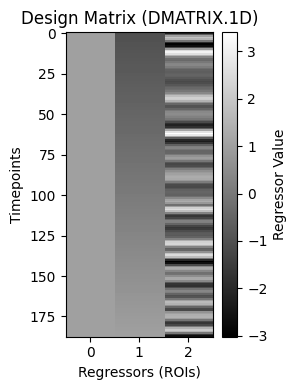

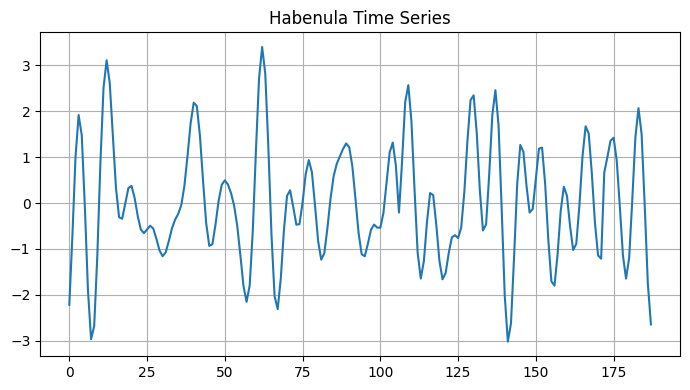

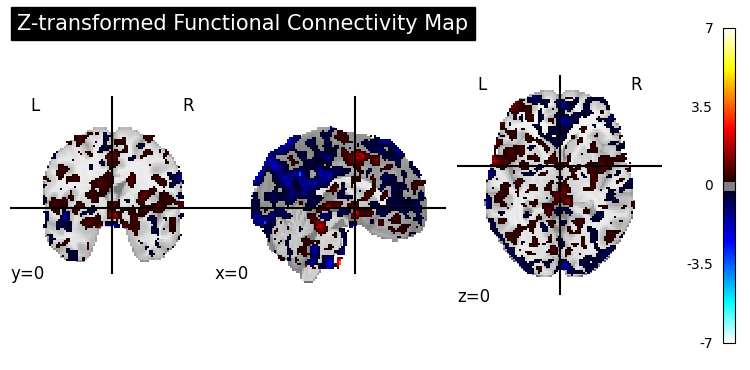

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import plotting, image

# === FILE PATHS ===
design_matrix_file = join(DATA_DIR,"sub-0050002_task-rest_space-MNI152NLin2009cAsym_res-2_dmatrix.1D")
roi_timeseries_file = join(DATA_DIR,"sub-0050002_task-rest_space-MNI152NLin2009cAsym_res-2_desc-hb_timeseries.txt")


# === LOAD DATA ===

# Load design matrix (AFNI .1D format is whitespace-delimited)
dmatrix = np.loadtxt(design_matrix_file)

# Load ROI time series (assumed to be single column)
roi_ts = pd.read_csv(roi_timeseries_file, header=None)

# === PLOT DESIGN MATRIX ===
plt.figure(figsize=(3, 4))
plt.imshow(dmatrix, aspect="auto", cmap="gray", interpolation="none")
plt.title("Design Matrix (DMATRIX.1D)")
plt.xlabel("Regressors (ROIs)")
plt.ylabel("Timepoints")
plt.colorbar(label="Regressor Value")
plt.tight_layout()
plt.show()

# === PLOT ROI TIME SERIES ===
plt.figure(figsize=(7, 4))
plt.plot(roi_ts, linewidth=1.5)
plt.title("Habenula Time Series")
#plt.xlabel("Timepoints")
#plt.ylabel("Mean BOLD Signal")
plt.grid(True)
plt.tight_layout()
plt.show()

# Load the z-map NIfTI image
zmap_path = join(DATA_DIR, "sub-0050002_task-rest_space-MNI152NLin2009cAsym_res-2_desc-norm_zmap.nii.gz")

zmap_img = image.load_img(zmap_path)

# Plot the z-map using a standard threshold
plotting.plot_stat_map(
    zmap_img,
    threshold=0.2,  # adjust based on your data (e.g., 1.96 ~ p<.05)
    display_mode="ortho",  # options: 'ortho', 'x', 'y', 'z', 'mosaic'
    title="Z-transformed Functional Connectivity Map",
    cut_coords=(0, 0, 0),  # center of brain, can be changed
    colorbar=True,
)
plotting.show()

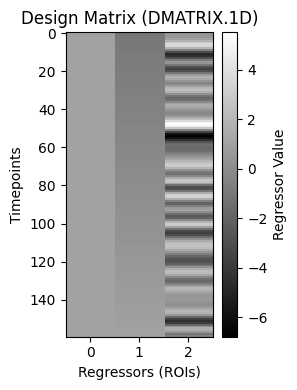

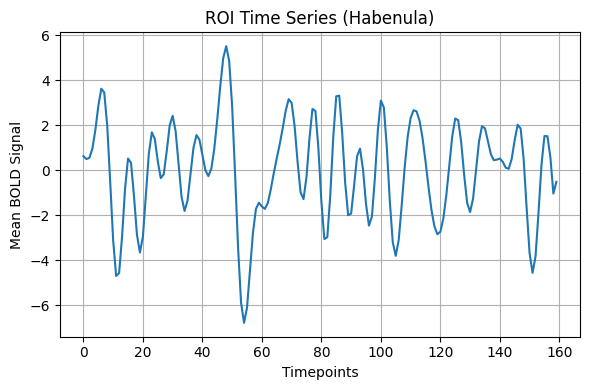

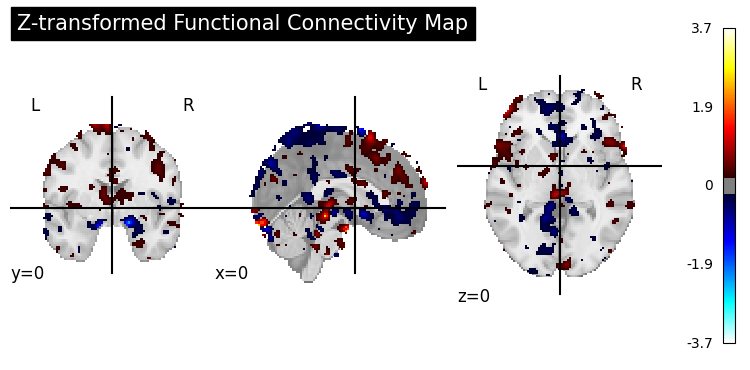

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import plotting, image

# === FILE PATHS ===
design_matrix_file = join(
    DATA_DIR, "sub-0050004_task-rest_space-MNI152NLin2009cAsym_res-2_dmatrix.1D"
)
roi_timeseries_file = join(
    DATA_DIR,
    "sub-0050004_task-rest_space-MNI152NLin2009cAsym_res-2_desc-hb_timeseries.txt",
)


# === LOAD DATA ===

# Load design matrix (AFNI .1D format is whitespace-delimited)
dmatrix = np.loadtxt(design_matrix_file)

# Load ROI time series (assumed to be single column)
roi_ts = pd.read_csv(roi_timeseries_file, header=None)

# === PLOT DESIGN MATRIX ===
plt.figure(figsize=(3, 4))
plt.imshow(dmatrix, aspect="auto", cmap="gray", interpolation="none")
plt.title("Design Matrix (DMATRIX.1D)")
plt.xlabel("Regressors (ROIs)")
plt.ylabel("Timepoints")
plt.colorbar(label="Regressor Value")
plt.tight_layout()
plt.show()

# === PLOT ROI TIME SERIES ===
plt.figure(figsize=(6, 4))
plt.plot(roi_ts, linewidth=1.5)
plt.title("ROI Time Series (Habenula)")
plt.xlabel("Timepoints")
plt.ylabel("Mean BOLD Signal")
plt.grid(True)
plt.tight_layout()
plt.show()

# Load the z-map NIfTI image
zmap_path = join(
    DATA_DIR,
    "sub-0050004_task-rest_space-MNI152NLin2009cAsym_res-2_desc-norm_zmap.nii.gz",
)

zmap_img = image.load_img(zmap_path)

# Plot the z-map using a standard threshold
plotting.plot_stat_map(
    zmap_img,
    threshold=0.2,  # adjust based on your data (e.g., 1.96 ~ p<.05)
    display_mode="ortho",  # options: 'ortho', 'x', 'y', 'z', 'mosaic'
    title="Z-transformed Functional Connectivity Map",
    cut_coords=(0, 0, 0),  # center of brain, can be changed
    colorbar=True,
)
plotting.show()

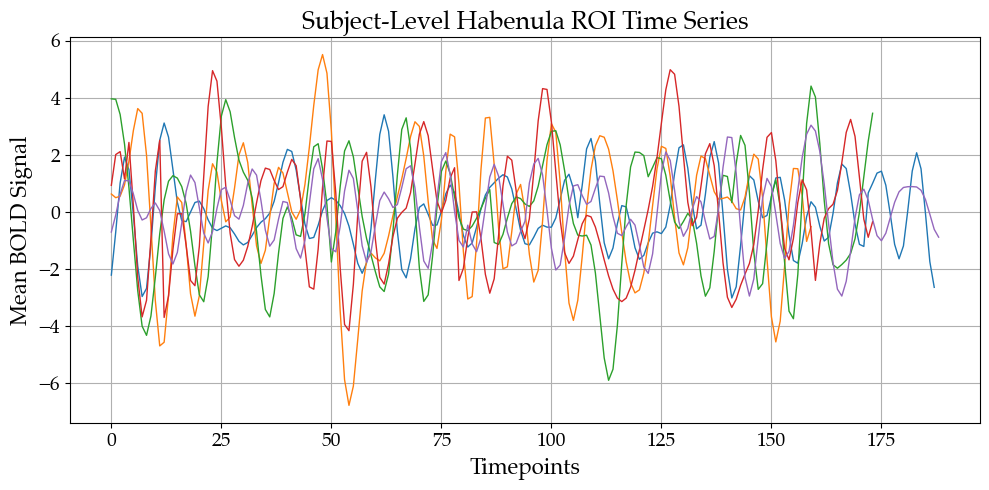

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from os.path import join
from glob import glob

pattern = join(DATA_DIR, "*_desc-hb_timeseries.txt")
timeseries_files = sorted(glob(pattern))

# === Set global font to Palatino ===
plt.rcParams["font.family"] = "Palatino"

# === Set global font to Palatino and increase font sizes ===
plt.rcParams["font.family"] = "Palatino"
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

# === PLOT ALL TIME SERIES ===
plt.figure(figsize=(10, 5))

for ts_file in timeseries_files:
    ts = pd.read_csv(ts_file, header=None)
    plt.plot(ts, linewidth=1)

plt.title("Subject-Level Habenula ROI Time Series")
plt.xlabel("Timepoints")
plt.ylabel("Mean BOLD Signal")
plt.grid(True)
plt.tight_layout()
plt.show()